# TIME SERIES

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("C:\\Users\\saisu\\Downloads\\AirPassengers.csv")

In [3]:
df.head()

,Month,Passengers
0,15-01-1949,112
1,15-02-1949,118
2,15-03-1949,132
3,15-04-1949,129
4,15-05-1949,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df.columns

Index(['Month', 'Passengers'], dtype='object')

In [6]:
df = df.set_index("Month")
df.head()

,Passengers
Month,
15-01-1949,112
15-02-1949,118
15-03-1949,132
15-04-1949,129
15-05-1949,121


# Visualize the time series

**check for trend,seasonally or random patterns**

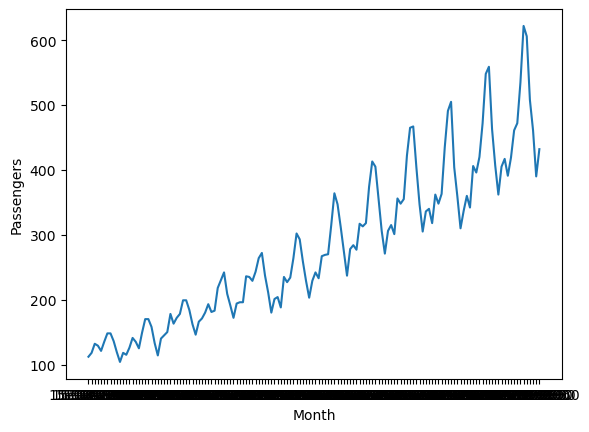

In [7]:
sns.lineplot(x=df.index, y=df['Passengers'])
plt.show()

# check for stationarity

**method-1: Rolling statistics**

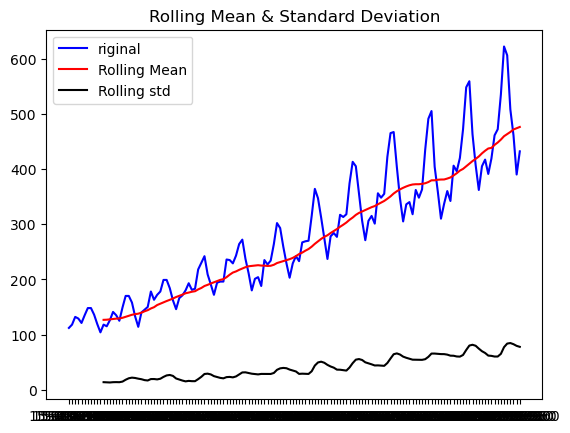

In [8]:
#determing rolling statistics
rolmean = df['Passengers'].rolling(window=12).mean()
rolstd = df['Passengers'].rolling(window=12).std()

#lot rolling statistics:
orig = plt.plot(df['Passengers'],color='blue',label='riginal')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling std')
plt.title("Rolling Mean & Standard Deviation")
plt.xticks(ticks=df.index)
plt.legend()
plt.show()

# **method 2: Augmented dicky fuller test**

In [9]:
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(df['Passengers'])
adfuller_result

(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [10]:
print('p-value',adfuller_result[1])

p-value 0.9918802434376411


**the time series is non-stationary**

# Now, we have to convert the non-stationary data to stationary data

**Differencing**

In [11]:
#apply differencing

diff = df['Passengers'] - df['Passengers'].shift(2)

diff.dropna(inplace=True)

#check whether the data is stationary or not after applying differencing

adfuller_result = adfuller(diff)
print("p-value of adf test:",adfuller_result[1])

p-value of adf test: 0.038629757676988535


 **Now,the time series is stationary**

# Train-test-split

**split the data into train(80%) & test(20%)**

 . for time series data, we have use first 80% of records for training & next 20% of records for testing

. here 80% = 0.8*142=144 records, so first 144 records we have to use for training

**note:we should not apply train-test-split function,because it divides dara randomly**

In [20]:
y_train = diff[:114]
y_test = diff[114:]

# Build ARIMA model

**arima model is build by using p,d,q values**

**plot ACF/PACF and find P & q parameters**

. **Auto corrlation Function(ACF)** - a function which gives  us value of auto-correlation of any series with its lagged values.

.**Partial Auto corrlation Function(PACF)**- an indirect function to find auto correlation after removing the relationship explained by previous lags

**time series lag example**

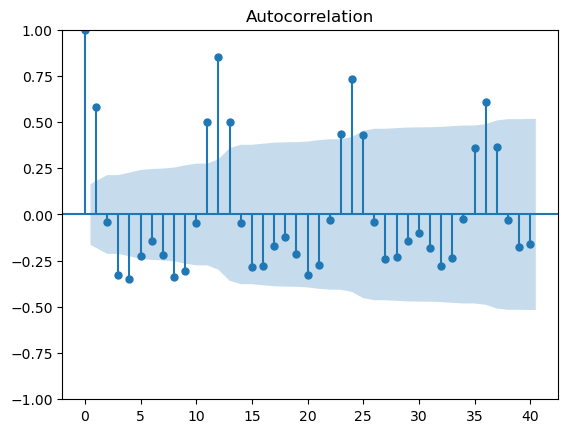

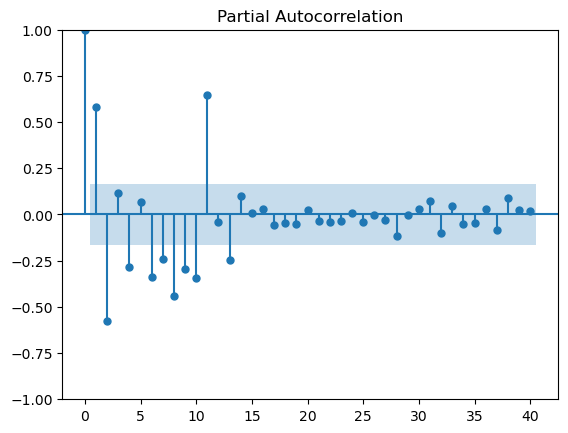

In [21]:
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm
fig = sm.graphics.tsa.plot_acf(diff,lags=40)
fig = sm.graphics.tsa.plot_pacf(diff,lags=40)

**from PACF curve ,optimal value of p value(AR model) is 11**

**from ACF curve ,optimal value of q value(MA model) is 12**

# ARIMA

**ARIMA model is build by using p,d,q values**

. p is AR value (determined from PACF plot)
. d is intergation
. q is MA value (determined from ACF plot)

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
#modelling
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(diff, order=(11,0,12))
ARIMA = model.fit()

#predictions
ypred_test = ARIMA.predict(start=y_test.index[0], end=y_test.index[-1])
ypred_train = ARIMA.predict(start=y_train.index[0], end=y_train.index[-1])

#evaluation
from sklearn.metrics import r2_score
print("Train R2 of ARIMA model:",r2_score(ypred_train,y_train))
print("Test R2 of ARIMA model:",r2_score(ypred_test,y_test))

Train R2 of ARIMA model: 0.9381754047533752
Test R2 of ARIMA model: 0.9658019818951038


# BUild SARIMAX model

 **whenever,there is seasonality in given data,apply SARIMAX**

**SARIMAX model is build by using p,d,q,s values**

. p is AR value (determined from PACF plot)
. d is intergation
. q is MA value (determined from ACF plot)
. s is seasonality value

In [ ]:
#modelling 
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(diff, seasonal_order=(11,0,12,12))
SARIMAX = model.fit()


#predictions
ypred_test = SARIMAX.predict(start=y_test.index[0], end=y_test.index[-1])
ypred_train = SARIMAX.predict(start=y_train.index[0], end=y_train.index[-1])

#evaluation
from sklearn.metrics import r2_score
print("Train R2 of SARIMAx model:",r2_score(ypred_train,y_train))
print("Test R2 of SARIMAx model:",r2_score(ypred_test,y_test))